In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'darkgrid')
import warnings
warnings.filterwarnings("ignore")

In [2]:
hotel_data = pd.read_csv('D:\\hotel_booking_data\\hotel_booking.csv')
hotel_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [3]:
hotel_data.select_dtypes(np.object).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 16 columns):
hotel                      119390 non-null object
arrival_date_month         119390 non-null object
meal                       119390 non-null object
country                    118902 non-null object
market_segment             119390 non-null object
distribution_channel       119390 non-null object
reserved_room_type         119390 non-null object
assigned_room_type         119390 non-null object
deposit_type               119390 non-null object
customer_type              119390 non-null object
reservation_status         119390 non-null object
reservation_status_date    119390 non-null object
name                       119390 non-null object
email                      119390 non-null object
phone-number               119390 non-null object
credit_card                119390 non-null object
dtypes: object(16)
memory usage: 14.6+ MB


In [4]:
hotel_data.select_dtypes([np.float64, np.int64]).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 20 columns):
is_canceled                       119390 non-null int64
lead_time                         119390 non-null int64
arrival_date_year                 119390 non-null int64
arrival_date_week_number          119390 non-null int64
arrival_date_day_of_month         119390 non-null int64
stays_in_weekend_nights           119390 non-null int64
stays_in_week_nights              119390 non-null int64
adults                            119390 non-null int64
children                          119386 non-null float64
babies                            119390 non-null int64
is_repeated_guest                 119390 non-null int64
previous_cancellations            119390 non-null int64
previous_bookings_not_canceled    119390 non-null int64
booking_changes                   119390 non-null int64
agent                             103050 non-null float64
company                           6797 non-nu

In [5]:
hotel_data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

In [6]:
hotel_data['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [7]:
hotel_data['hotel'].value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

In [8]:
hotel_data.groupby(['arrival_date_year','hotel'])['hotel'].count()

arrival_date_year  hotel       
2015               City Hotel      13682
                   Resort Hotel     8314
2016               City Hotel      38140
                   Resort Hotel    18567
2017               City Hotel      27508
                   Resort Hotel    13179
Name: hotel, dtype: int64

In [9]:
df = hotel_data.groupby(['arrival_date_year','hotel'])['hotel'].count().rename_axis(['arrival_date_year','hotel']).reset_index(name = 'counts')
df

,arrival_date_year,hotel,counts
0,2015,City Hotel,13682
1,2015,Resort Hotel,8314
2,2016,City Hotel,38140
3,2016,Resort Hotel,18567
4,2017,City Hotel,27508
5,2017,Resort Hotel,13179


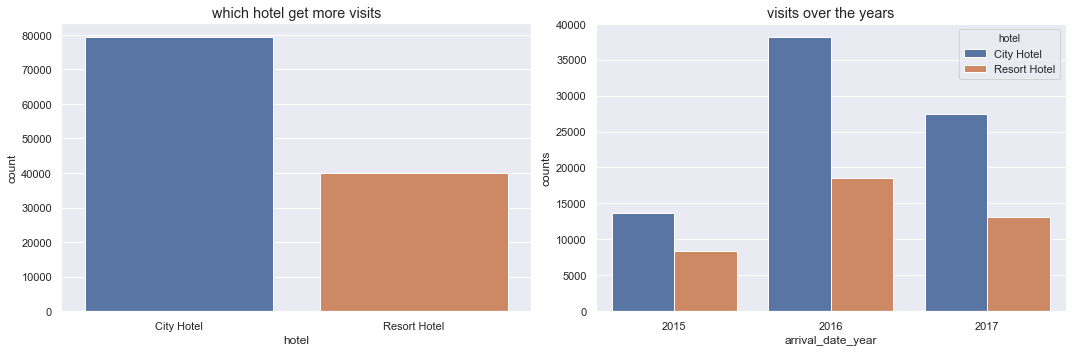

In [10]:
f,ax = plt.subplots(1,2, figsize = (15,5))

sns.countplot(x = 'hotel', data = hotel_data, ax = ax[0],order = ['City Hotel', 'Resort Hotel']  )
ax[0].set_title('which hotel get more visits', size = 'x-large')

sns.barplot(x = 'arrival_date_year', y = 'counts', data = df, hue = 'hotel', ax = ax[1])
ax[1].set_title('visits over the years',size = 'x-large')

plt.tight_layout()
plt.show()

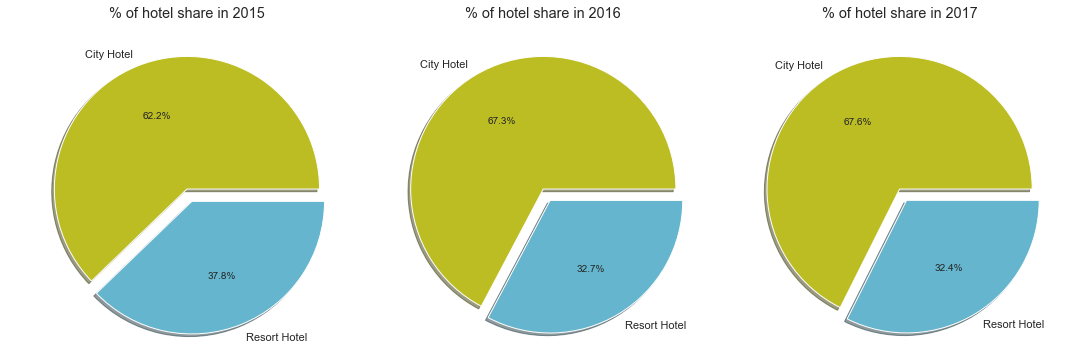

In [11]:
f,ax = plt.subplots(1,3, figsize = (15,5))


hotel_data[hotel_data['arrival_date_year']== 2015].groupby('hotel')['hotel'].count().plot.pie(ax = ax[0], explode =list(np.linspace(0,0.1,2)), shadow = True, autopct = '%1.1f%%',colors = ['tab:olive', 'c'])
ax[0].set_ylabel(" ")
ax[0].set_title('% of hotel share in 2015', size = 'x-large')

hotel_data[hotel_data['arrival_date_year']== 2016].groupby('hotel')['hotel'].count().plot.pie(ax = ax[1], explode =list(np.linspace(0,0.1,2)), shadow = True, autopct = '%1.1f%%', colors = ['tab:olive', 'c'])
ax[1].set_ylabel(" ")
ax[1].set_title('% of hotel share in 2016', size = 'x-large')

hotel_data[hotel_data['arrival_date_year']== 2017].groupby('hotel')['hotel'].count().plot.pie(ax = ax[2], explode =list(np.linspace(0,0.1,2)), shadow = True, autopct = '%1.1f%%', colors = ['tab:olive', 'c'])
ax[2].set_ylabel(" ")
ax[2].set_title('% of hotel share in 2017', size = 'x-large')

plt.tight_layout()
plt.show()


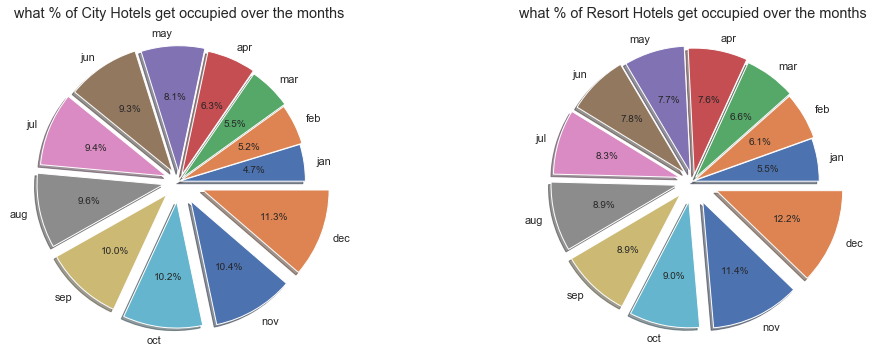

In [12]:
f,ax = plt.subplots(1,2, figsize = (15,5))

labels = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

hotel_data[hotel_data['hotel']=='City Hotel']['arrival_date_month'].value_counts(ascending = True).plot.pie(ax = ax[0], explode =list(np.linspace(0,0.2,12)), shadow = True, autopct = '%1.1f%%', labels = labels)
ax[0].set_ylabel(" ")
ax[0].set_title('what % of City Hotels get occupied over the months', size = 'x-large')

hotel_data[hotel_data['hotel']=='Resort Hotel']['arrival_date_month'].value_counts(ascending = True).plot.pie(ax = ax[1], explode =list(np.linspace(0,0.2,12)), shadow = True, autopct = '%1.1f%%', labels= labels)
ax[1].set_ylabel(" ")
ax[1].set_title('what % of Resort Hotels get occupied over the months', size = 'x-large')

plt.tight_layout()
plt.show()

In [13]:
df3 = hotel_data.groupby(['stays_in_weekend_nights','hotel'])['hotel'].count().rename_axis(['stays_in_weekend_nights','hotel']).reset_index(name = 'counts')
df3.head(10)

,stays_in_weekend_nights,hotel,counts
0,0,City Hotel,37817
1,0,Resort Hotel,14181
2,1,City Hotel,21434
3,1,Resort Hotel,9192
4,2,City Hotel,19333
5,2,Resort Hotel,13975
6,3,City Hotel,323
7,3,Resort Hotel,936
8,4,City Hotel,297
9,4,Resort Hotel,1558


In [14]:
df4 = hotel_data.groupby(['stays_in_week_nights','hotel'])['hotel'].count().rename_axis(['stays_in_week_nights','hotel']).reset_index(name = 'counts')
df4.head(10)

,stays_in_week_nights,hotel,counts
0,0,City Hotel,4963
1,0,Resort Hotel,2682
2,1,City Hotel,21088
3,1,Resort Hotel,9222
4,2,City Hotel,26403
5,2,Resort Hotel,7281
6,3,City Hotel,16371
7,3,Resort Hotel,5887
8,4,City Hotel,6141
9,4,Resort Hotel,3422


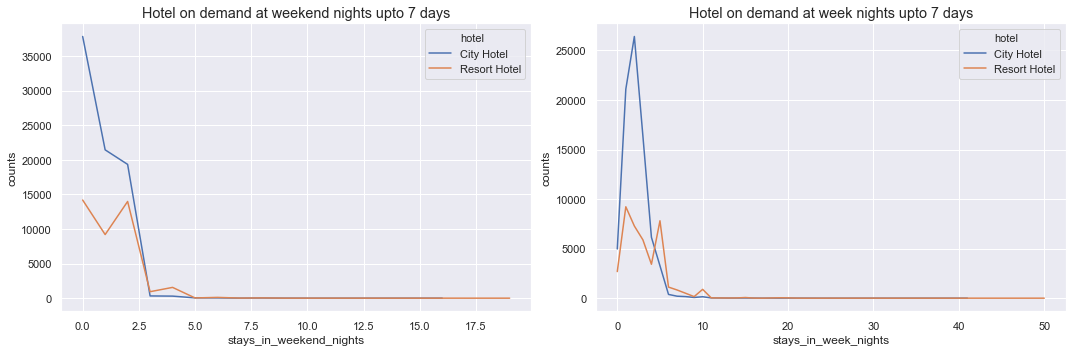

In [15]:
f,ax = plt.subplots(1,2, figsize = (15,5))

sns.lineplot( x = 'stays_in_weekend_nights', y = 'counts' , data = df3, hue = 'hotel', ax= ax[0])
ax[0].set_title('Hotel on demand at weekend nights upto 7 days', size = 'x-large')

sns.lineplot( x = 'stays_in_week_nights', y = 'counts' , data = df4, hue = 'hotel', ax = ax[1])
ax[1].set_title('Hotel on demand at week nights upto 7 days',size = 'x-large')

plt.tight_layout()
plt.show()

In [16]:
hotel_data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

In [17]:
print(hotel_data['meal'].unique(),'\n')
print('BB : Bed and breakfast','\n','FB: Full board, breakfast','\n', 'lunch & dinner included, HB: half board, breakfast and dinner included','\n', 'SC: self catrering','\n')

['BB' 'FB' 'HB' 'SC' 'Undefined'] 

BB : Bed and breakfast 
 FB: Full board, breakfast 
 lunch & dinner included, HB: half board, breakfast and dinner included 
 SC: self catrering 



In [18]:
hotel_data[hotel_data['hotel']=='City Hotel'].groupby('meal')['meal'].count()

meal
BB    62305
FB       44
HB     6417
SC    10564
Name: meal, dtype: int64

In [19]:
hotel_data[hotel_data['hotel']=='Resort Hotel'].groupby('meal')['meal'].count()

meal
BB           30005
FB             754
HB            8046
SC              86
Undefined     1169
Name: meal, dtype: int64

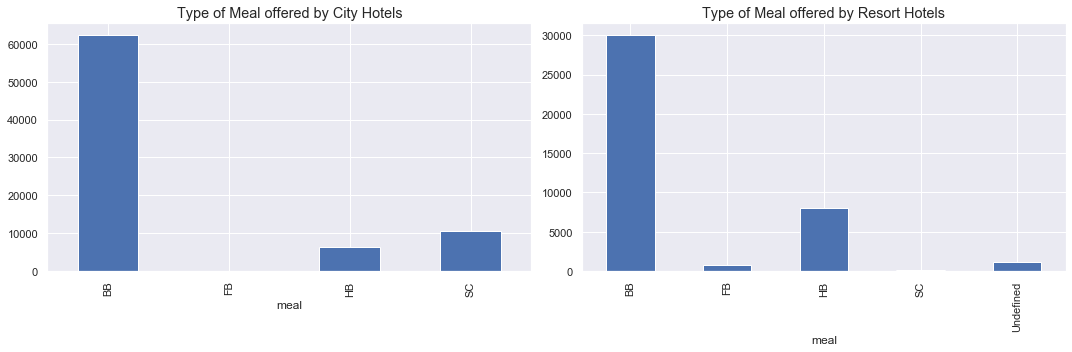

In [20]:
f,ax = plt.subplots(1,2, figsize = (15,5))

hotel_data[hotel_data['hotel']=='City Hotel'].groupby('meal')['meal'].count().plot(ax = ax[0],kind = 'bar' )
ax[0].set_title('Type of Meal offered by City Hotels', size = 'x-large')

hotel_data[hotel_data['hotel']=='Resort Hotel'].groupby('meal')['meal'].count().plot(ax = ax[1], kind = 'bar')
ax[1].set_title('Type of Meal offered by Resort Hotels', size = 'x-large')

plt.tight_layout()
plt.show()

In [21]:
hotel_data['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [22]:
hotel_data['market_segment'].value_counts()

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

In [23]:
df4 = hotel_data.groupby(['market_segment', 'hotel'])['hotel'].count().rename_axis(['market_segment','hotel']).reset_index(name = 'counts')
df4

,market_segment,hotel,counts
0,Aviation,City Hotel,237
1,Complementary,City Hotel,542
2,Complementary,Resort Hotel,201
3,Corporate,City Hotel,2986
4,Corporate,Resort Hotel,2309
5,Direct,City Hotel,6093
6,Direct,Resort Hotel,6513
7,Groups,City Hotel,13975
8,Groups,Resort Hotel,5836
9,Offline TA/TO,City Hotel,16747


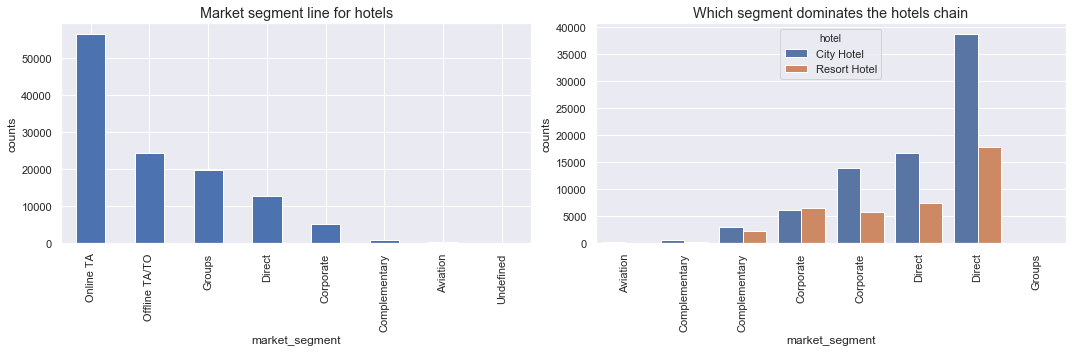

In [24]:
f,ax = plt.subplots(1,2, figsize = (15,5))

hotel_data['market_segment'].value_counts().plot(ax = ax[0],kind = 'bar')
ax[0].set_xlabel('market_segment')
ax[0].set_ylabel('counts')
ax[0].set_title('Market segment line for hotels', size = 'x-large')

sns.barplot(x = 'market_segment', y = 'counts', data = df4, hue = 'hotel', ax = ax[1])
ax[1].set_xticklabels(df4['market_segment'],rotation = 90)
ax[1].set_title('Which segment dominates the hotels chain', size = 'x-large')

plt.tight_layout()
plt.show()

In [25]:
hotel_data[hotel_data['hotel'] == 'City Hotel']['is_repeated_guest'].value_counts()

0    77298
1     2032
Name: is_repeated_guest, dtype: int64

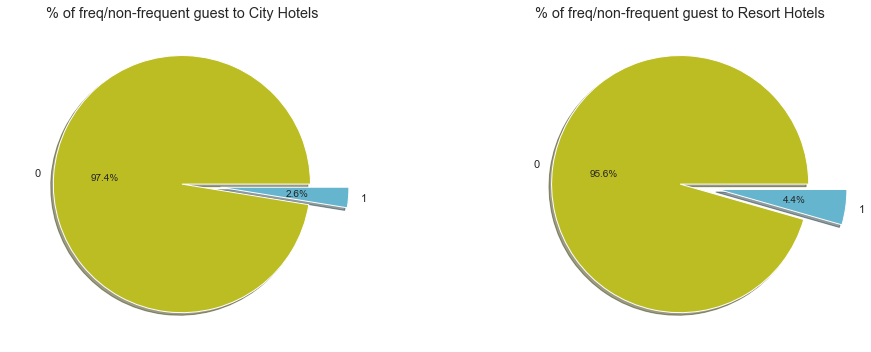

In [26]:
f,ax = plt.subplots(1,2, figsize = (15,5))

hotel_data[hotel_data['hotel'] == 'City Hotel']['is_repeated_guest'].value_counts().plot.pie(ax = ax[0], explode =list(np.linspace(0,0.3,2)), shadow = True, autopct = '%1.1f%%', colors = ['tab:olive', 'c'])
ax[0].set_ylabel(" ")
ax[0].set_title('% of freq/non-frequent guest to City Hotels', size = 'x-large')

hotel_data[hotel_data['hotel'] == 'Resort Hotel']['is_repeated_guest'].value_counts().plot.pie(ax = ax[1], explode =list(np.linspace(0,0.3,2)), shadow = True, autopct = '%1.1f%%', colors = ['tab:olive', 'c'])
ax[1].set_ylabel(" ")
ax[1].set_title('% of freq/non-frequent guest to Resort Hotels', size = 'x-large')

plt.tight_layout()
plt.show()

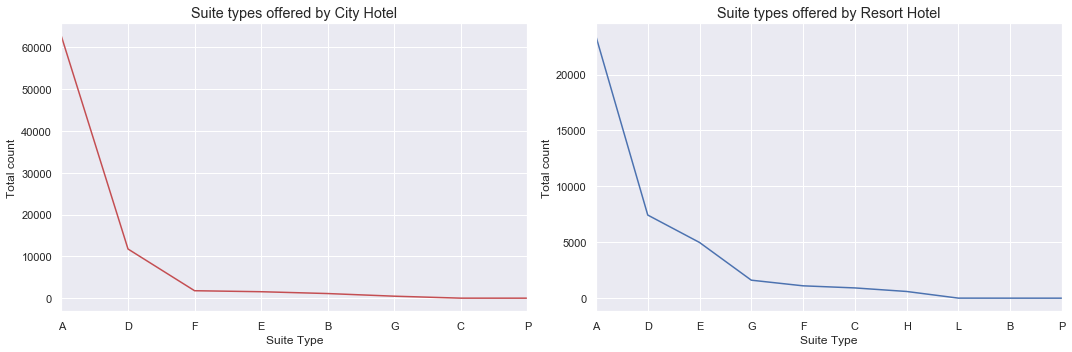

In [27]:
f,ax = plt.subplots(1,2, figsize = (15,5))

hotel_data[hotel_data['hotel']== 'City Hotel']['reserved_room_type'].value_counts().plot(kind= 'line', ax= ax[0], color = 'r')
ax[0].set_title('Suite types offered by City Hotel', size = 'x-large')
ax[0].set_xlabel('Suite Type')
ax[0].set_ylabel('Total count')

hotel_data[hotel_data['hotel']== 'Resort Hotel']['reserved_room_type'].value_counts().plot(kind= 'line', ax = ax[1], color = 'b')
ax[1].set_title('Suite types offered by Resort Hotel',size = 'x-large')
ax[1].set_xlabel('Suite Type')
ax[1].set_ylabel('Total count')

plt.tight_layout()
plt.show()

In [28]:
hotel_data['days_in_waiting_list'].unique()

array([  0,  50,  47,  65, 122,  75, 101, 150, 125,  14,  60,  34, 100,
        22, 121,  61,  39,   5,   1,   8, 107,  43,  52,   2,  11, 142,
       116,  13,  44,  97,  83,   4, 113,  18,  20, 185,  93, 109,   6,
        37, 105, 154,  64,  99,  38,  48,  33,  77,  21,  80,  59,  40,
        58,  89,  53,  49,  69,  87,  91,  57, 111,  79,  98,  85,  63,
        15,   3,  41, 224,  31,  56, 187, 176,  71,  55,  96, 236, 259,
       207, 215, 160, 120,  30,  32,  27,  62,  24, 108, 147, 379,  70,
        35, 178, 330, 223, 174, 162, 391,  68, 193,  10,  76,  16,  28,
         9, 165,  17,  25,  46,   7,  84, 175, 183,  23, 117,  12,  54,
        26,  73,  45,  19,  42,  72,  81,  92,  74, 167,  36], dtype=int64)

In [29]:
hotel_data.groupby(['arrival_date_month', 'hotel'])['days_in_waiting_list'].mean()

arrival_date_month  hotel       
April               City Hotel      4.315107
                    Resort Hotel    0.312552
August              City Hotel      0.615941
                    Resort Hotel    0.000000
December            City Hotel      3.255808
                    Resort Hotel    2.620091
February            City Hotel      1.117019
                    Resort Hotel    0.201418
January             City Hotel      3.982334
                    Resort Hotel    0.046056
July                City Hotel      0.358432
                    Resort Hotel    0.002624
June                City Hotel      2.517988
                    Resort Hotel    0.495895
March               City Hotel      1.832920
                    Resort Hotel    0.494305
May                 City Hotel      6.161322
                    Resort Hotel    0.124192
November            City Hotel      2.326601
                    Resort Hotel    0.768568
October             City Hotel      5.846022
                    Re

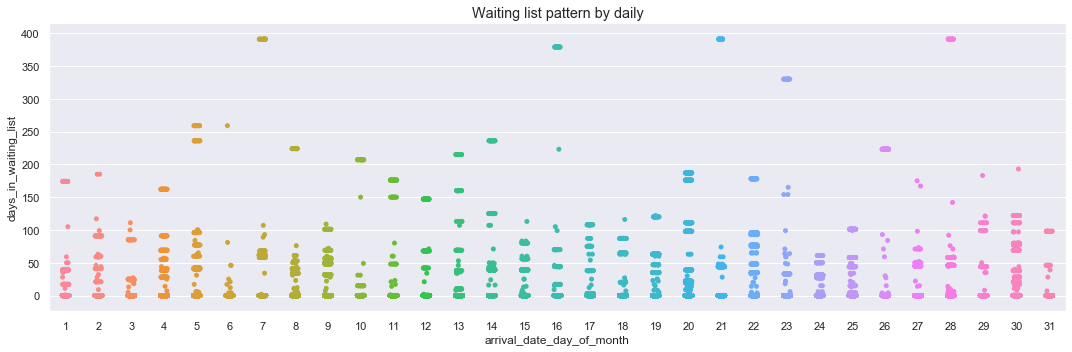

In [30]:
plt.figure(figsize=(15,5))
sns.stripplot(x = 'arrival_date_day_of_month', y ='days_in_waiting_list', data = hotel_data , jitter = True)
plt.title('Waiting list pattern by daily', size = 'x-large')
plt.tight_layout()
plt.show()

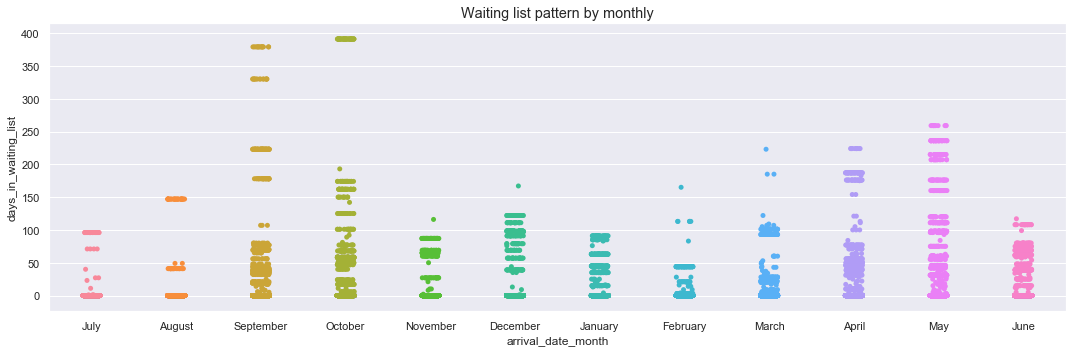

In [31]:
plt.figure(figsize=(15,5))

sns.stripplot(x = 'arrival_date_month', y ='days_in_waiting_list', data = hotel_data , jitter = True)
plt.title('Waiting list pattern by monthly', size = 'x-large')
plt.tight_layout()
plt.show()

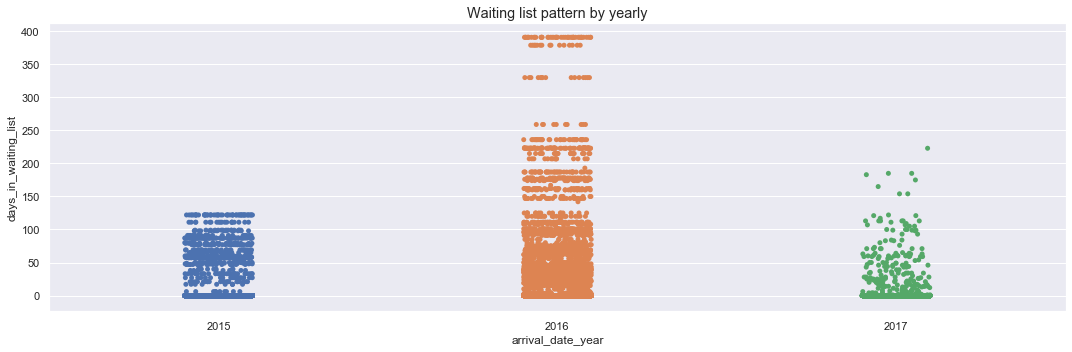

In [32]:
plt.figure(figsize=(15,5))

sns.stripplot(x = 'arrival_date_year', y ='days_in_waiting_list', data = hotel_data , jitter = True)
plt.title('Waiting list pattern by yearly', size = 'x-large')
plt.tight_layout()
plt.show()

In [33]:
hotel_data['customer_type'].unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [34]:
hotel_data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

In [35]:
hotel_data.groupby(['arrival_date_year', 'hotel','is_canceled'])['is_canceled'].count()

arrival_date_year  hotel         is_canceled
2015               City Hotel    0               7678
                                 1               6004
                   Resort Hotel  0               6176
                                 1               2138
2016               City Hotel    0              22733
                                 1              15407
                   Resort Hotel  0              13637
                                 1               4930
2017               City Hotel    0              15817
                                 1              11691
                   Resort Hotel  0               9125
                                 1               4054
Name: is_canceled, dtype: int64

In [36]:
hotel_data[(hotel_data['arrival_date_year'] == 2015) & (hotel_data['hotel'] == 'City Hotel')]['is_canceled'].value_counts()

0    7678
1    6004
Name: is_canceled, dtype: int64

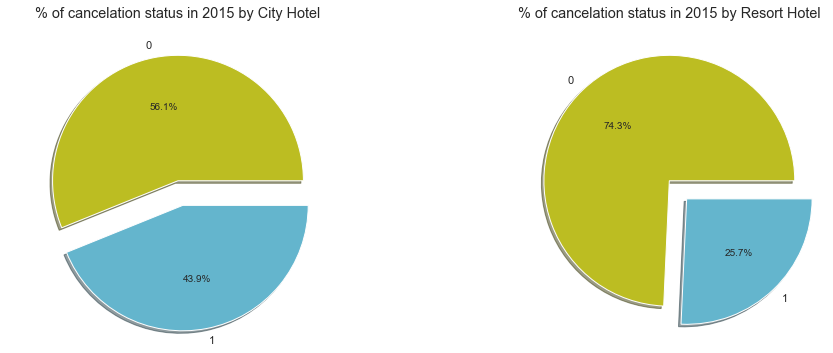

In [37]:
f,ax = plt.subplots(1,2, figsize = (15,5))

hotel_data[(hotel_data['arrival_date_year'] == 2015) & (hotel_data['hotel'] == 'City Hotel')]['is_canceled'].value_counts().plot.pie(ax = ax[0], explode =list(np.linspace(0,0.2,2)), shadow = True, autopct = '%1.1f%%', colors = ['tab:olive', 'c'])
ax[0].set_ylabel(" ")
ax[0].set_title('% of cancelation status in 2015 by City Hotel', size = 'x-large')

hotel_data[(hotel_data['arrival_date_year'] == 2015) & (hotel_data['hotel'] == 'Resort Hotel')]['is_canceled'].value_counts().plot.pie(ax = ax[1], explode =list(np.linspace(0,0.2,2)), shadow = True, autopct = '%1.1f%%', colors = ['tab:olive', 'c'])
ax[1].set_ylabel(" ")
ax[1].set_title('% of cancelation status in 2015 by Resort Hotel', size = 'x-large')

plt.tight_layout()
plt.show()

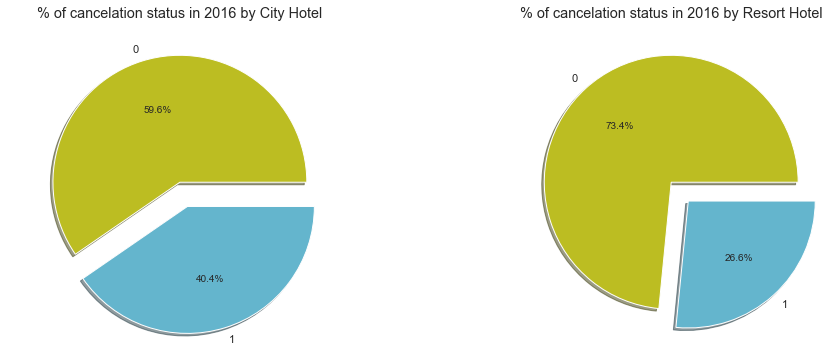

In [38]:
f,ax = plt.subplots(1,2, figsize = (15,5))

hotel_data[(hotel_data['arrival_date_year'] == 2016) & (hotel_data['hotel'] == 'City Hotel')]['is_canceled'].value_counts().plot.pie(ax = ax[0], explode =list(np.linspace(0,0.2,2)), shadow = True, autopct = '%1.1f%%', colors = ['tab:olive', 'c'])
ax[0].set_ylabel(" ")
ax[0].set_title('% of cancelation status in 2016 by City Hotel', size = 'x-large')

hotel_data[(hotel_data['arrival_date_year'] == 2016) & (hotel_data['hotel'] == 'Resort Hotel')]['is_canceled'].value_counts().plot.pie(ax = ax[1], explode =list(np.linspace(0,0.2,2)), shadow = True, autopct = '%1.1f%%', colors = ['tab:olive', 'c'])
ax[1].set_ylabel(" ")
ax[1].set_title('% of cancelation status in 2016 by Resort Hotel', size = 'x-large')

plt.tight_layout()
plt.show()

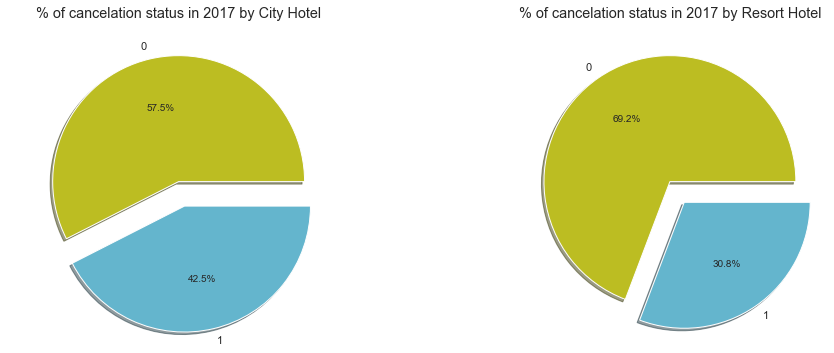

In [39]:
f,ax = plt.subplots(1,2, figsize = (15,5))

hotel_data[(hotel_data['arrival_date_year'] == 2017) & (hotel_data['hotel'] == 'City Hotel')]['is_canceled'].value_counts().plot.pie(ax = ax[0], explode =list(np.linspace(0,0.2,2)), shadow = True, autopct = '%1.1f%%', colors = ['tab:olive', 'c'])
ax[0].set_ylabel(" ")
ax[0].set_title('% of cancelation status in 2017 by City Hotel', size = 'x-large')

hotel_data[(hotel_data['arrival_date_year'] == 2017) & (hotel_data['hotel'] == 'Resort Hotel')]['is_canceled'].value_counts().plot.pie(ax = ax[1], explode =list(np.linspace(0,0.2,2)), shadow = True, autopct = '%1.1f%%', colors = ['tab:olive', 'c'])
ax[1].set_ylabel(" ")
ax[1].set_title('% of cancelation status in 2017 by Resort Hotel', size = 'x-large')

plt.tight_layout()
plt.show()

In [40]:
hotel_data['reserved_room_type'].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'P', 'B'], dtype=object)

In [41]:
hotel_data['assigned_room_type'].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'I', 'B', 'H', 'P', 'L', 'K'],
      dtype=object)

In [42]:
hotel_data['customer_type'].unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [43]:
hotel_data.groupby(['customer_type', 'reserved_room_type'])['reserved_room_type'].count()

customer_type    reserved_room_type
Contract         A                      2867
                 B                        75
                 C                        10
                 D                       843
                 E                       177
                 F                       102
                 G                         1
                 H                         1
Group            A                       365
                 B                         6
                 C                         5
                 D                       143
                 E                        33
                 F                        10
                 G                        12
                 H                         2
                 P                         1
Transient        A                     60948
                 B                       637
                 C                       828
                 D                     16420
                 E 

## Cost Analysis

In [44]:
hotel_data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

In [45]:
# average daily price of listed hotels
hotel_data.groupby('hotel')['adr'].mean()

hotel
City Hotel      105.304465
Resort Hotel     94.952930
Name: adr, dtype: float64

In [46]:
# max daily price of listed hotels
hotel_data.groupby('hotel')['adr'].max()

hotel
City Hotel      5400.0
Resort Hotel     508.0
Name: adr, dtype: float64

In [47]:
# average daily price of listed hotels by year
hotel_data.groupby(['arrival_date_year', 'hotel'])['adr'].mean()

arrival_date_year  hotel       
2015               City Hotel       85.856915
                   Resort Hotel     89.353417
2016               City Hotel      103.483683
                   Resort Hotel     87.730762
2017               City Hotel      117.501864
                   Resort Hotel    108.660217
Name: adr, dtype: float64

In [48]:
# max daily price of listed hotels by year
hotel_data.groupby(['arrival_date_year', 'hotel'])['adr'].max()

arrival_date_year  hotel       
2015               City Hotel       290.0
                   Resort Hotel     508.0
2016               City Hotel      5400.0
                   Resort Hotel     384.0
2017               City Hotel       510.0
                   Resort Hotel     450.0
Name: adr, dtype: float64

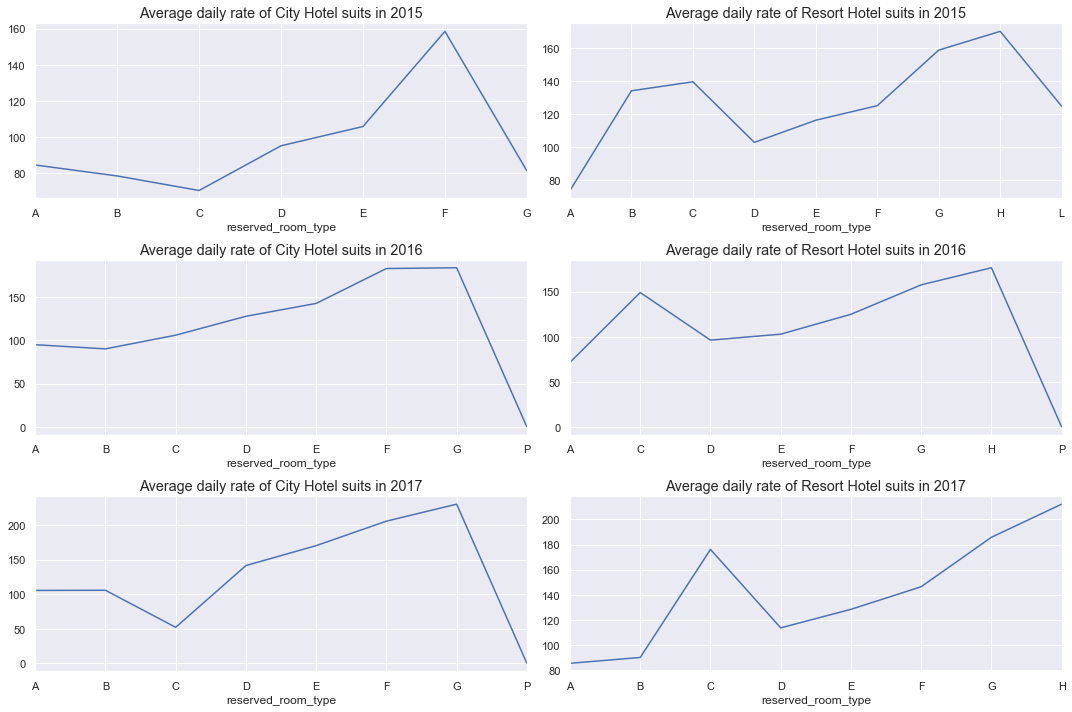

In [49]:
f,ax = plt.subplots(3,2, figsize = (15,10))

hotel_data[(hotel_data['arrival_date_year'] == 2015) & (hotel_data['hotel'] =='City Hotel')].groupby('reserved_room_type')['adr'].mean().plot(kind = 'line', ax = ax[0,0])
ax[0,0].set_title('Average daily rate of City Hotel suits in 2015', size = 'x-large')

hotel_data[(hotel_data['arrival_date_year'] == 2015) & (hotel_data['hotel'] =='Resort Hotel')].groupby('reserved_room_type')['adr'].mean().plot(kind = 'line', ax = ax[0,1])
ax[0,1].set_title('Average daily rate of Resort Hotel suits in 2015', size = 'x-large')

hotel_data[(hotel_data['arrival_date_year'] == 2016) & (hotel_data['hotel'] =='City Hotel')].groupby('reserved_room_type')['adr'].mean().plot(kind = 'line', ax = ax[1,0])
ax[1,0].set_title('Average daily rate of City Hotel suits in 2016', size = 'x-large')

hotel_data[(hotel_data['arrival_date_year'] == 2016) & (hotel_data['hotel'] =='Resort Hotel')].groupby('reserved_room_type')['adr'].mean().plot(kind = 'line', ax = ax[1,1])
ax[1,1].set_title('Average daily rate of Resort Hotel suits in 2016', size = 'x-large')

hotel_data[(hotel_data['arrival_date_year'] == 2017) & (hotel_data['hotel'] =='City Hotel')].groupby('reserved_room_type')['adr'].mean().plot(kind = 'line', ax = ax[2,0])
ax[2,0].set_title('Average daily rate of City Hotel suits in 2017', size = 'x-large')

hotel_data[(hotel_data['arrival_date_year'] == 2017) & (hotel_data['hotel'] =='Resort Hotel')].groupby('reserved_room_type')['adr'].mean().plot(kind = 'line', ax = ax[2,1])
ax[2,1].set_title('Average daily rate of Resort Hotel suits in 2017', size = 'x-large')

plt.tight_layout()
plt.show()

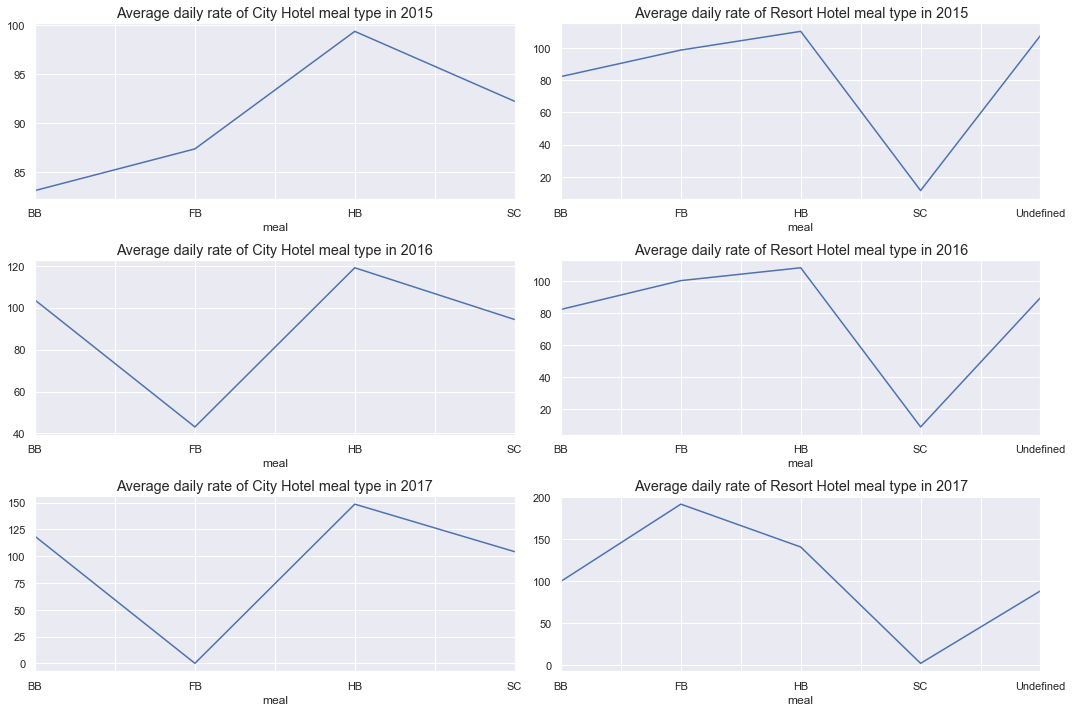

In [50]:
f,ax = plt.subplots(3,2, figsize = (15,10))

hotel_data[(hotel_data['arrival_date_year'] == 2015) & (hotel_data['hotel'] =='City Hotel')].groupby('meal')['adr'].mean().plot(kind = 'line', ax = ax[0,0])
ax[0,0].set_title('Average daily rate of City Hotel meal type in 2015', size = 'x-large')

hotel_data[(hotel_data['arrival_date_year'] == 2015) & (hotel_data['hotel'] =='Resort Hotel')].groupby('meal')['adr'].mean().plot(kind = 'line', ax = ax[0,1])
ax[0,1].set_title('Average daily rate of Resort Hotel meal type in 2015', size = 'x-large')

hotel_data[(hotel_data['arrival_date_year'] == 2016) & (hotel_data['hotel'] =='City Hotel')].groupby('meal')['adr'].mean().plot(kind = 'line', ax = ax[1,0])
ax[1,0].set_title('Average daily rate of City Hotel meal type in 2016', size = 'x-large')

hotel_data[(hotel_data['arrival_date_year'] == 2016) & (hotel_data['hotel'] =='Resort Hotel')].groupby('meal')['adr'].mean().plot(kind = 'line', ax = ax[1,1])
ax[1,1].set_title('Average daily rate of Resort Hotel meal type in 2016', size = 'x-large')

hotel_data[(hotel_data['arrival_date_year'] == 2017) & (hotel_data['hotel'] =='City Hotel')].groupby('meal')['adr'].mean().plot(kind = 'line', ax = ax[2,0])
ax[2,0].set_title('Average daily rate of City Hotel meal type in 2017', size = 'x-large')

hotel_data[(hotel_data['arrival_date_year'] == 2017) & (hotel_data['hotel'] =='Resort Hotel')].groupby('meal')['adr'].mean().plot(kind = 'line', ax = ax[2,1])
ax[2,1].set_title('Average daily rate of Resort Hotel meal type in 2017', size = 'x-large')

plt.tight_layout()
plt.show()

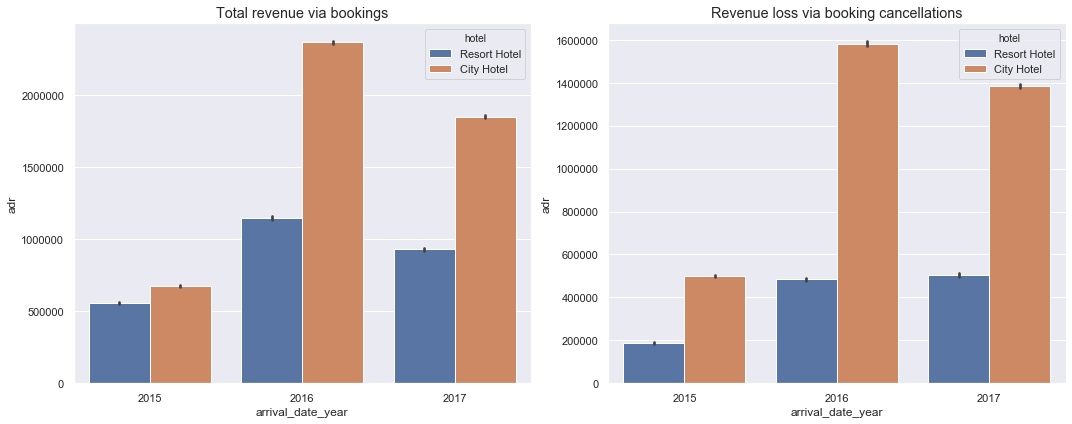

In [51]:
f,ax = plt.subplots(1,2, figsize = (15,6))

sns.barplot(x = 'arrival_date_year', y = 'adr', data = hotel_data[hotel_data['is_canceled']==0], hue = 'hotel', estimator= sum, ax = ax[0])
ax[0].set_title('Total revenue via bookings', size = 'x-large')

sns.barplot(x = 'arrival_date_year', y = 'adr', data = hotel_data[hotel_data['is_canceled']==1], hue = 'hotel', estimator= sum, ax = ax[1])
ax[1].set_title('Revenue loss via booking cancellations', size = 'x-large')

plt.tight_layout()
plt.show()

In [ ]:
'customer_type',
'required_car_parking_spaces',
'total_of_special_requests',

In [55]:
hotel_data['customer_type'].unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [56]:
hotel_data['required_car_parking_spaces'].unique()

array([0, 1, 2, 8, 3], dtype=int64)

In [57]:
hotel_data['total_of_special_requests'].unique()

array([0, 1, 3, 2, 4, 5], dtype=int64)